In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
import scipy
from matplotlib.lines import Line2D
import itertools


from style_vars import *
plt.style.use('default')
plt.style.use('style.mplstyle')

hps_lines = [Line2D([0], [0], color='black', ls='--'),
                Line2D([0], [0], color='black')]

wt_d4_lines = [Line2D([0], [0], color=C_W),
                Line2D([0], [0], color=C_4)]

In [2]:
ls = lmp.LMP(md_dir=None)

dijs_d4, dijs_d12, dijs_wt, dijs_d7  = [],[],[],[]
prots = ["D4", "WT", "12D_D4"]
for T in range(8):
    s = np.genfromtxt(f'/home/adria/powerlaws/flory_dij_12D_D4_{T}.txt')
    dijs_d12.append([np.arange(440),*s])
    
    s = np.genfromtxt(f'/home/adria/powerlaws/flory_dij_D4_{T}.txt')
    dijs_d4.append([np.arange(440),*s])
    
    s = np.genfromtxt(f'/home/adria/powerlaws/flory_dij_WT_{T}.txt')
    dijs_wt.append([np.arange(448),*s])
    
    s = np.genfromtxt(f'/home/adria/powerlaws/flory_dij_7D_WT_{T}.txt')
    dijs_d7.append([np.arange(448),*s])

dijs_wt = np.array(dijs_wt)
dijs_d7 = np.array(dijs_d7)
dijs_d4 = np.array(dijs_d4)
dijs_d12 = np.array(dijs_d12)
# ijjs = [np.arange(440),*s]
# # print(np.array(ijjs).shape)
wt_florys = ls.flory_scaling_fit(ijs=dijs_wt)[0]
d4_florys = ls.flory_scaling_fit(ijs=dijs_d4)[0]
d12_florys = ls.flory_scaling_fit(ijs=dijs_d12)[0]
d7_florys = ls.flory_scaling_fit(ijs=dijs_d7)[0]

In [3]:
wt_08_hps_T = hmd.HMD(md_dir='/home/adria/data/real_final/HPS-T/SLABS/WT', every=10, equil_frames=1000)

> Taking frames every 10 for a total of [3320, 3062, 2874, 2697, 2590, 2501, 2440, 2444] to avoid strong correlations


In [4]:
wt_08_hps_T.phase_diagram()

(3320, 157)
fit Failed
Interfaces at  [0, 0] [0, 0]


/home/adria/scripts/md/md/analysis.py:1210: RuntimeWarning: invalid value encountered in true_divide
  condensed_densities.append((mass_condensed / volume_condensed).mean())


(3062, 157)
Interfaces at  [-112.5181008905459, 112.5181008905459] [-192.78043627440795, 192.78043627440795]
(2874, 157)
Interfaces at  [-89.27859787243929, 89.27859787243929] [-160.14555976365892, 160.14555976365892]
(2697, 157)
Interfaces at  [-71.71257855529932, 71.71257855529932] [-142.195754273439, 142.195754273439]
(2590, 157)
Interfaces at  [-66.41704176059905, 66.41704176059905] [-129.2963733524971, 129.2963733524971]
(2501, 157)
Interfaces at  [-61.61065336198478, 61.61065336198478] [-121.8908360290091, 121.8908360290091]
(2440, 157)
Interfaces at  [-64.35894268856002, 64.35894268856002] [-117.14555351808123, 117.14555351808123]
(2444, 157)
Interfaces at  [-54.54374264831773, 54.54374264831773] [-105.8312246869773, 105.8312246869773]


(array([38.066494549054894, 3.4712038978376043, 3.3466298673459436,
        2.910774448430762, 2.78485779221402, 2.7180734093073995,
        0.8797053279579161, 4.727032864656349], dtype=object),
 array([nan, 280.7393865167171, 345.4569013549946, 404.8422340054927,
        443.6795741032024, 471.99931180437704, 501.3223541876616,
        513.3447335203026], dtype=object))

In [5]:
wt_08_hps_T.temperatures

array([270., 277., 284., 291., 298., 305., 312., 320.])

In [6]:
wt_08_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/WT', every=10)
d4_08_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/D4', every=10)
d12_08_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/12D_D4', every=10)
d7_08_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/7D_WT', every=10)

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


In [7]:
d12_08_hps_T.rg(), d4_08_hps_T.rg()

((array([52.181968  , 45.54116581, 40.13941974, 37.01189046, 37.47577715,
         41.7938094 , 49.57010226, 58.81106389]),
  array([0.20120467, 0.1223048 , 0.18853344, 0.09578621, 0.17853676,
         0.53684328, 0.25656369, 0.21100067])),
 (array([50.04802204, 45.07064819, 38.92310942, 36.59336626, 37.11798887,
         41.49377575, 49.43683636, 57.75885003]),
  array([0.23316368, 0.19570067, 0.32477094, 0.18560027, 0.2656368 ,
         0.35427922, 0.28215287, 0.32785582])))

In [8]:
wt_florys_eq = wt_08_hps_T.flory_scaling_formula()
d7_florys_eq = d7_08_hps_T.flory_scaling_formula()
d4_florys_eq = d4_08_hps_T.flory_scaling_formula()
d12_florys_eq = d12_08_hps_T.flory_scaling_formula()

def get_tc(florys, temps):
    slope = florys[1]-florys[0]
    slope /= temps[1]-temps[0]
    x = np.linspace(270,300, 8)
    fit = slope*(x-temps[1])+florys[1]
    return (0.5-florys[1])/slope+temps[1]

wt_tc_fit = get_tc(wt_florys, wt_08_hps_T.temperatures)
d7_tc_fit = get_tc(d7_florys, d7_08_hps_T.temperatures)
d4_tc_fit = get_tc(d4_florys, d4_08_hps_T.temperatures)
d12_tc_fit = get_tc(d12_florys, d12_08_hps_T.temperatures)

wt_tc_eq = get_tc(wt_florys_eq, wt_08_hps_T.temperatures)
d7_tc_eq = get_tc(d7_florys_eq, d7_08_hps_T.temperatures)
d4_tc_eq = get_tc(d4_florys_eq, d4_08_hps_T.temperatures)
d12_tc_eq = get_tc(d12_florys_eq, d12_08_hps_T.temperatures)

[51.385481   46.12113533 40.36979169 37.92032266 39.28142923 43.84458601
 51.3696931  59.38931221]
[51.98854493 45.2692068  40.68275943 38.30749406 38.74248456 43.11412377
 51.41488007 59.02422971]
[50.04802204 45.07064819 38.92310942 36.59336626 37.11798887 41.49377575
 49.43683636 57.75885003]
[52.181968   45.54116581 40.13941974 37.01189046 37.47577715 41.7938094
 49.57010226 58.81106389]


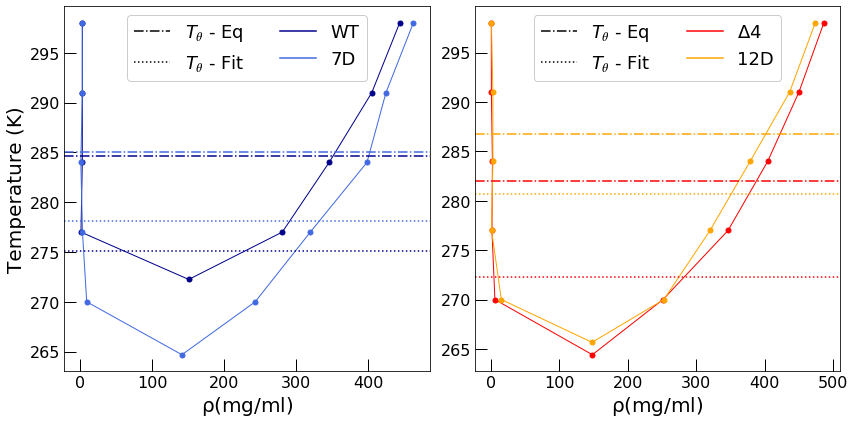

In [9]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

d4_slab = np.genfromtxt('/home/adria/data/real_final/08_pd_d4.txt')
d12_slab = np.genfromtxt('/home/adria/data/real_final/08_pd_d12.txt')

wt_slab = np.genfromtxt('/home/adria/data/real_final/08_pd_wt.txt')
d7_slab = np.genfromtxt('/home/adria/data/real_final/08_pd_d7.txt')

axs[1].plot(d4_slab[3:-3,0], d4_slab[3:-3,1], ls='-', marker='o', lw=1, markersize=5, color=C_4, label=L_4)
axs[1].plot(d12_slab[3:-3,0], d12_slab[3:-3,1], ls='-', marker='o', lw=1, markersize=5, color=C_12, label=L_12)
axs[1].legend([Line2D([0], [0], color='black', ls='dashdot'), Line2D([0], [0], color='black', ls='dotted'),
            Line2D([0], [0], color=C_4), Line2D([0], [0], color=C_12)],
           ["$T_{𝜃}$ - Eq","$T_{𝜃}$ - Fit",L_4, L_12], ncol=2, loc='upper center')
# axs[0].legend([Line2D([0], [0], color=C_4), Line2D([0], [0], color=C_12)], [L_4, L_12], ncol=1, loc='upper center')
axs[1].axhline(d12_tc_eq, color=C_12, ls='dashdot')
axs[1].axhline(d4_tc_eq, color=C_4, ls='dashdot')
axs[1].axhline(d12_tc_fit, color=C_12, ls='dotted')
axs[1].axhline(d4_tc_fit, color=C_4, ls='dotted')
axs[1].set_xlabel("$\mathrm{ρ(mg/ml)}$")
axs[0].set_ylabel("Temperature (K)")

axs[0].plot(wt_slab[3:-3,0], wt_slab[3:-3,1], ls='-', marker='o', lw=1, markersize=5, color=C_W, label=L_W)
axs[0].plot(d7_slab[3:-3,0], d7_slab[3:-3,1], ls='-', marker='o', lw=1, markersize=5, color=C_7, label=L_7)
axs[0].legend(loc='lower right')
axs[0].set_xlabel("$\mathrm{ρ(mg/ml)}$")
axs[0].axhline(wt_tc_eq, color=C_W, ls='dashdot')
axs[0].axhline(d7_tc_eq, color=C_7, ls='dashdot')
axs[0].axhline(wt_tc_fit, color=C_W, ls='dotted')
axs[0].axhline(d7_tc_fit, color=C_7, ls='dotted')
axs[0].legend([Line2D([0], [0], color='black', ls='dashdot'), Line2D([0], [0], color='black', ls='dotted'),
            Line2D([0], [0], color=C_W), Line2D([0], [0], color=C_7)],
           ["$T_{𝜃}$ - Eq","$T_{𝜃}$ - Fit",L_W, L_7], ncol=2, loc='upper center')
# axs[1].legend([Line2D([0], [0], color=C_W), Line2D([0], [0], color=C_7)], [L_W, L_7], ncol=1, loc='upper center')

fig.tight_layout()

In [70]:
d = wt_slab[:7,0]
c = wt_slab[7:,0]
temps = wt_slab[7:,1]
r = lmp.LMP(md_dir=None)
r.find_Tc_from_diagram(rho_c=c, rho_d=d, temperatures=temps)
# d,c,temps, wt_slab

PPT1 [150.6183348  272.24476529] PPT2 [-136.75153307  210.37034719    3.71082701]


/home/adria/scripts/md/md/analysis.py:1233: RuntimeWarning: invalid value encountered in power
  return A * (x - Tc_sc) ** beta


(array([[  3.59922594, 320.        ],
        [  3.58461917, 319.97611044],
        [  3.57002695, 319.95222088],
        ...,
        [532.52459809, 319.95222088],
        [532.62526001, 319.97611044],
        [532.7259074 , 320.        ]]), array([150.6183348 , 272.24476529]))

In [2]:
alpha = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/CPEB4_alpha_slab_good')

> Run Completed at 100.00% for CPEB4_alpha. Ran 20000 steps for a total of 3 frames 
> Taking frames every 10 for a total of [1964, 1967, 1674, 1578, 1523, 1431, 1357, 1321] to avoid strong correlations


In [3]:
alpha.phase_diagram()

(1964, 144)
Interfaces at  [-59.72660153142203, 59.72660153142203] [-419.5235022221614, 419.5235022221614]
(1967, 144)
Interfaces at  [-2.613286281902339, 2.613286281902339] [-349.7801935933304, 349.7801935933304]
(1674, 144)


/home/adria/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Interfaces at  [-0.3234849521453828, 0.3234849521453828] [-199.38542717625415, 199.38542717625415]
(1578, 144)
Interfaces at  [-13.171344418707413, 13.171344418707413] [-69.17677352747694, 69.17677352747694]
(1523, 144)
Interfaces at  [-12.906545839471939, 12.906545839471939] [-61.2896887357763, 61.2896887357763]
(1431, 144)
Interfaces at  [-10.91579002845357, 10.91579002845357] [-55.64338706257354, 55.64338706257354]
(1357, 144)
Interfaces at  [-10.48504723357454, 10.48504723357454] [-53.38356377589606, 53.38356377589606]
(1321, 144)
Interfaces at  [-9.669715539199634, 9.669715539199634] [-52.29038176283341, 52.29038176283341]


(array([1.9781465066801107, 3.4760958772676775, 20.110705837346295,
        25.503950758204788, 25.250720010004578, 25.485303424552722,
        25.37783047950552, 25.47494425886464], dtype=object),
 array([208.5664385663679, 286.8506112135, 371.003985842281,
        407.20169845104726, 447.6754225336158, 474.6934597569571,
        508.17424930608286, 514.3508580498526], dtype=object))

In [2]:
d = [1.9781465066801107, 3.4760958772676775, 20.110705837346295,
        25.503950758204788, 25.250720010004578, 25.485303424552722,
        25.37783047950552, 25.47494425886464]
c = [208.5664385663679, 286.8506112135, 371.003985842281,
        407.20169845104726, 447.6754225336158, 474.6934597569571,
        508.17424930608286, 514.3508580498526]

In [5]:
alpha.find_Tc_from_diagram(rho_d=np.array(d), rho_c=np.array(c), temperatures=alpha.temperatures)

PPT1 [136.72392877 266.57978818] PPT2 [-154.16971198  231.42341319    4.88816971]


/home/adria/scripts/md/md/analysis.py:1230: RuntimeWarning: invalid value encountered in power
  return A * (x - Tc_sc) ** beta


(array([[ 44.26063486, 320.        ],
        [ 44.21411323, 319.97327653],
        [ 44.16760527, 319.94655306],
        ...,
        [542.14263273, 319.94655306],
        [542.2701695 , 319.97327653],
        [542.39769258, 320.        ]]), array([136.72392877, 266.57978818]))

In [3]:
rho_c, tc = [136.72392877], [266.57978818]

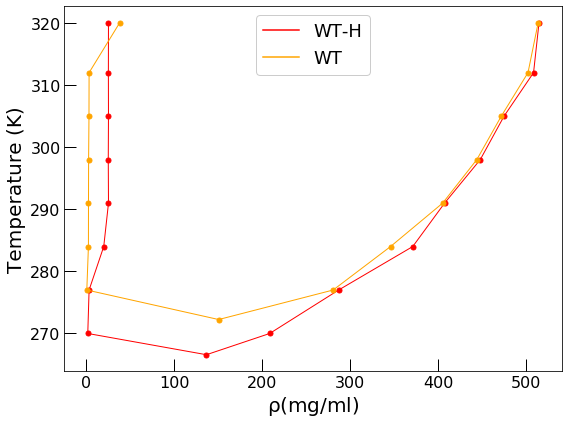

In [7]:
fig, axs = plt.subplots(figsize=(8,6))

wt_alpha = np.genfromtxt('/home/adria/data/real_final/08_pd_wta.txt')
wt = np.genfromtxt('/home/adria/data/real_final/08_pd_wt.txt')

axs.plot(wt_alpha[:,0], wt_alpha[:,1], ls='-', marker='o', lw=1, markersize=5, color=C_4, label=L_4)
axs.plot(wt[:,0], wt[:,1], ls='-', marker='o', lw=1, markersize=5, color=C_12, label=L_12)
axs.legend([
            Line2D([0], [0], color=C_4), Line2D([0], [0], color=C_12)],
           ["WT-H", "WT"], ncol=1, loc='upper center')
# axs[0].legend([Line2D([0], [0], color=C_4), Line2D([0], [0], color=C_12)], [L_4, L_12], ncol=1, loc='upper center')
# axs[0].axhline(d12_tc_eq, color=C_12, ls='dashdot')
# axs[0].axhline(d4_tc_eq, color=C_4, ls='dashdot')
# axs[0].axhline(d12_tc_fit, color=C_12, ls='dotted')
# axs[0].axhline(d4_tc_fit, color=C_4, ls='dotted')
axs.set_xlabel("$\mathrm{ρ(mg/ml)}$")
axs.set_ylabel("Temperature (K)")

# axs[1].plot(wt_slab[3:-3,0], wt_slab[3:-3,1], ls='-', marker='o', lw=1, markersize=5, color=C_W, label=L_W)
# axs[1].plot(d7_slab[3:-3,0], d7_slab[3:-3,1], ls='-', marker='o', lw=1, markersize=5, color=C_7, label=L_7)
# axs[1].legend(loc='lower right')
# axs[1].set_xlabel("$\mathrm{ρ(mg/ml)}$")
# axs[1].axhline(wt_tc_eq, color=C_W, ls='dashdot')
# axs[1].axhline(d7_tc_eq, color=C_7, ls='dashdot')
# axs[1].axhline(wt_tc_fit, color=C_W, ls='dotted')
# axs[1].axhline(d7_tc_fit, color=C_7, ls='dotted')
# axs[1].legend([Line2D([0], [0], color='black', ls='dashdot'), Line2D([0], [0], color='black', ls='dotted'),
#             Line2D([0], [0], color=C_W), Line2D([0], [0], color=C_7)],
#            ["$T_{𝜃}$ - Eq","$T_{𝜃}$ - Fit",L_W, L_7], ncol=2, loc='upper center')
# axs[1].legend([Line2D([0], [0], color=C_W), Line2D([0], [0], color=C_7)], [L_W, L_7], ncol=1, loc='upper center')

fig.tight_layout()

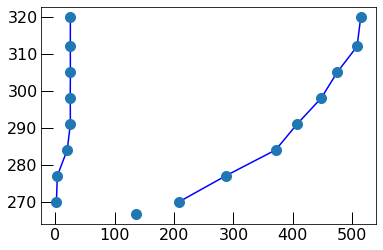

In [7]:
# d12.find_Tc_from_diagram(rho_c=np.array(c), rho_d=np.array(d), temperatures=d12.temperatures)

temps = alpha.temperatures

saver = np.zeros(shape=(len(d)*2+1,2))
saver[:8,0]=np.flip(d)
saver[:8,1]=np.flip(temps)
saver[8,0]=rho_c[0]
saver[8,1]=tc[0]
saver[9:,0]=c
saver[9:,1]=temps


np.savetxt('/home/adria/data/real_final/08_pd_wta.txt', saver)

plt.plot(d,temps, color='blue')
plt.plot(c,temps, color='blue')
# plt.figure()
# dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_wt.txt')
# plt.plot(dcc[:,0],dcc[:,1])
dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_wta.txt')
plt.plot(dcc[:,0],dcc[:,1], ls='', marker='o')

In [3]:
d7 = hmd.HMD(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/SLABS/0.8-csuc/7D_WT_08')

> Taking frames every 10 for a total of [3132, 2901, 2717, 2559, 2458, 2385, 2345, 2312] to avoid strong correlations


In [4]:
d7.phase_diagram()

(3132, 157)
Interfaces at  [-98.25263866664142, 98.25263866664142] [-211.471138564407, 211.471138564407]
(2901, 157)
Interfaces at  [-104.96824549508997, 104.96824549508997] [-170.71730356359328, 170.71730356359328]
(2717, 157)
Interfaces at  [-85.75042190822295, 85.75042190822295] [-145.68186368484393, 145.68186368484393]
(2559, 157)
Interfaces at  [-76.6045138463104, 76.6045138463104] [-130.27705311564748, 130.27705311564748]
(2458, 157)
Interfaces at  [-67.44941581686027, 67.44941581686027] [-121.34381073531937, 121.34381073531937]
(2385, 157)
Interfaces at  [-68.12023049430965, 68.12023049430965] [-115.57566753012681, 115.57566753012681]
(2345, 157)
Interfaces at  [-61.09708113358115, 61.09708113358115] [-109.39248762571845, 109.39248762571845]
(2312, 157)
Interfaces at  [-60.99632911990123, 60.99632911990123] [-108.9848235557654, 108.9848235557654]


(array([8.845271556427786, 2.9796867408557426, 0.6756072177046878,
        2.7404781759477577, 2.6646834080735724, 6.828036743718886,
        2.678811860203451, 2.6514296431382425], dtype=object),
 array([243.00749961139059, 319.61942025970365, 398.3683045831763,
        424.74263951606514, 462.7268646610887, 425.409695808496,
        511.2143324987726, 514.8476550127832], dtype=object))

In [5]:
d = [8.845271556427786, 2.9796867408557426, 0.6756072177046878,
        2.7404781759477577, 2.6646834080735724, 6.828036743718886,
        2.678811860203451, 2.6514296431382425]
c = [243.00749961139059, 319.61942025970365, 398.3683045831763,
        424.74263951606514, 462.7268646610887, 425.409695808496,
        511.2143324987726, 514.8476550127832]

In [6]:
d7.find_Tc_from_diagram(rho_c=np.array(c), rho_d=np.array(d), temperatures=d7.temperatures)


PPT1 [141.19226267 264.68563046] PPT2 [-169.69064579  211.81829084    3.09076242]


/home/adria/scripts/md/md/analysis.py:1230: RuntimeWarning: invalid value encountered in power
  return A * (x - Tc_sc) ** beta


(array([[ 10.81682024, 320.        ],
        [ 10.79060597, 319.97232898],
        [ 10.76440599, 319.94465796],
        ...,
        [530.87050942, 319.94465796],
        [530.98133931, 319.97232898],
        [531.0921549 , 320.        ]]), array([141.19226267, 264.68563046]))

(17, 2)


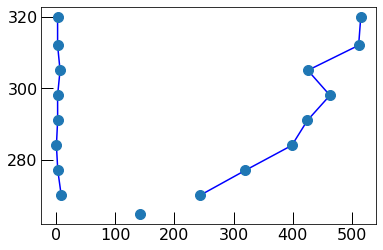

In [9]:
# d12.find_Tc_from_diagram(rho_c=np.array(c), rho_d=np.array(d), temperatures=d12.temperatures)
rho_c = [141.19226267]
tc = [264.68563046]

temps = d7.temperatures

saver = np.zeros(shape=(len(d)*2+1,2))
print(saver.shape)
saver[:8,0]=np.flip(d)
saver[:8,1]=np.flip(temps)
saver[8,0]=rho_c[0]
saver[8,1]=tc[0]
saver[9:,0]=c
saver[9:,1]=temps


np.savetxt('/home/adria/data/real_final/08_pd_d7.txt', saver)

plt.plot(d,d7.temperatures, color='blue')
plt.plot(c,d7.temperatures, color='blue')
# plt.figure()
# dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_wt.txt')
# plt.plot(dcc[:,0],dcc[:,1])
dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_d7.txt')
plt.plot(dcc[:,0],dcc[:,1], ls='', marker='o')

In [7]:
# d12.find_Tc_from_diagram(rho_c=np.array(c), rho_d=np.array(d), temperatures=d12.temperatures)
rho_c = [144.01087455]
tc = [264.69511426]

temps = d12.temperatures

saver = np.zeros(shape=(len(d)*2+1,2))
print(saver.shape)
saver[:8,0]=np.flip(d)
saver[:8,1]=np.flip(temps)
saver[8,0]=rho_c[0]
saver[8,1]=tc[0]
saver[9:,0]=c
saver[9:,1]=temps


np.savetxt('/home/adria/data/real_final/08_pd_d7.txt', saver)

plt.plot(d,d12.temperatures, color='blue')
plt.plot(c,d12.temperatures, color='blue')
# plt.figure()
# dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_wt.txt')
# plt.plot(dcc[:,0],dcc[:,1])
dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_d7.txt')
plt.plot(dcc[:,0],dcc[:,1], ls='', marker='o')

NameError: name 'd12' is not defined

In [3]:
d12 = hmd.HMD(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/SLABS/0.8-csuc/12D_08')

> Taking frames every 10 for a total of [3338, 2986, 2769, 2632, 2475, 2399, 2321, 2288] to avoid strong correlations


In [4]:
d12.phase_diagram()

(3338, 157)
Interfaces at  [-41.75750200266926, 41.75750200266926] [-238.9961750196914, 238.9961750196914]
(2986, 157)
Interfaces at  [-103.89499001457703, 103.89499001457703] [-180.18348109763846, 180.18348109763846]
(2769, 157)
Interfaces at  [-73.5861610578087, 73.5861610578087] [-151.80051586057104, 151.80051586057104]
(2632, 157)
Interfaces at  [-68.38052515076735, 68.38052515076735] [-128.27075336108723, 128.27075336108723]
(2475, 157)
Interfaces at  [-67.88040859667811, 67.88040859667811] [-123.27913666866677, 123.27913666866677]
(2399, 157)
Interfaces at  [-62.60288306025055, 62.60288306025055] [-115.56064209139423, 115.56064209139423]
(2321, 157)
Interfaces at  [-59.89827551147154, 59.89827551147154] [-112.40007184728024, 112.40007184728024]
(2288, 157)
Interfaces at  [-59.87631369463173, 59.87631369463173] [-108.44684219543477, 108.44684219543477]


(array([15.195663615564673, 0.8337206430688398, 2.7945750853852465,
        2.7991444760377915, 0.6943888006908928, 1.033232051419006,
        2.6999975226811888, 1.0987178762495393], dtype=object),
 array([252.57914488870105, 320.06445443032544, 378.693788700334,
        436.3137991831435, 473.70471379303643, 501.2924158447446,
        499.21913097087963, 530.589938460529], dtype=object))

(17, 2)


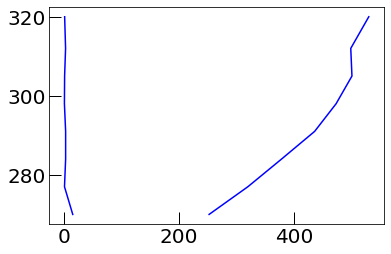

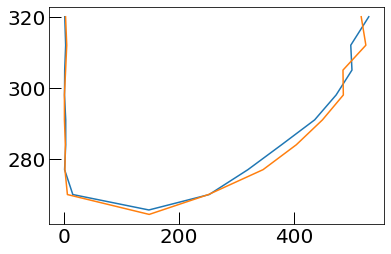

In [14]:
d = [15.195663615564673, 0.8337206430688398, 2.7945750853852465,
        2.7991444760377915, 0.6943888006908928, 1.033232051419006,
        2.6999975226811888, 1.0987178762495393]
c = [252.57914488870105, 320.06445443032544, 378.693788700334,
        436.3137991831435, 473.70471379303643, 501.2924158447446,
        499.21913097087963, 530.589938460529]
# d12.find_Tc_from_diagram(rho_c=np.array(c), rho_d=np.array(d), temperatures=d12.temperatures)
rho_c = [147.65995817]
tc = [265.66659614]

temps = d12.temperatures

saver = np.zeros(shape=(len(d)*2+1,2))
print(saver.shape)
saver[:8,0]=np.flip(d)
saver[:8,1]=np.flip(temps)
saver[8,0]=rho_c[0]
saver[8,1]=tc[0]
saver[9:,0]=c
saver[9:,1]=temps


np.savetxt('/home/adria/data/real_final/08_pd_d12.txt', saver)

plt.plot(d,d12.temperatures, color='blue')
plt.plot(c,d12.temperatures, color='blue')
plt.figure()
dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_d12.txt')
plt.plot(dcc[:,0],dcc[:,1])
dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_d4.txt')
plt.plot(dcc[:,0],dcc[:,1])

(17, 2)
[[  5.7471009  320.        ]
 [  1.43075382 312.        ]
 [  2.17254373 305.        ]
 [  0.57476623 298.        ]
 [  0.53847396 291.        ]
 [  2.62092004 284.        ]
 [  4.57256612 277.        ]
 [  2.52610358 270.        ]
 [148.15776184 264.41558979]
 [251.31271993 270.        ]
 [346.44267726 277.        ]
 [404.36145272 284.        ]
 [449.91648792 291.        ]
 [486.25949636 298.        ]
 [485.66376905 305.        ]
 [525.51355507 312.        ]
 [517.39728456 320.        ]]
PPT1 [148.15776184 264.41558979] PPT2 [-71.29988627 211.71371273   7.53534476]


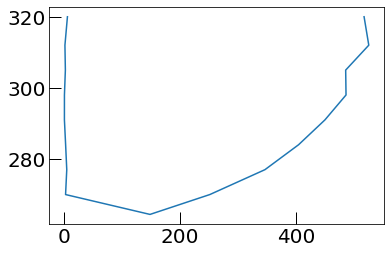

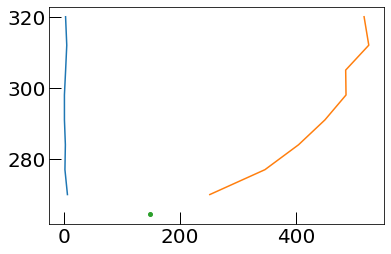

In [42]:
# d = [5.747100896680286, 1.430753822293296, 2.1725437321726737,
#         0.5747662251584651, 0.538473955986617, 2.6209200403903963,
#         4.572566121260307, 2.5261035780443404]
# c = [251.31271992712, 346.442677263773, 404.3614527214531,
#         449.9164879205547, 486.25949636227546, 485.66376905051527,
#         525.5135550686858, 517.3972845584258]
# rho_c = [148.15776184]
# tc = [264.41558979]

# temps = s.temperatures

# saver = np.zeros(shape=(len(d)*2+1,2))
# print(saver.shape)
# saver[:8,0]=np.flip(d)
# saver[:8,1]=np.flip(temps)
# saver[8,0]=rho_c[0]
# saver[8,1]=tc[0]
# saver[9:,0]=c
# saver[9:,1]=temps

# print(saver)

# np.savetxt('/home/adria/data/real_final/08_pd_d4.txt', saver)
# dcc = np.genfromtxt('147.65995817 265.66659614')
# plt.figure()
# plt.plot(dcc[:,0],dcc[:,1])

# plt.figure()
# plt.plot(d,temps)
# plt.plot(c,temps)
# s.find_Tc_from_diagram(rho_c=np.array(c), rho_d=np.array(d), temperatures=s.temperatures)
# plt.plot(148.15776184, 264.41558979, marker='o', markersize=4)

In [21]:
s = np.arange(0,18)
s[:7]

array([0, 1, 2, 3, 4, 5, 6])

In [8]:
s = hmd.HMD(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/SLABS/0.8-csuc/WT',every=1)

(30617, 157)
(26963, 157)
(25007, 157)
(24434, 157)


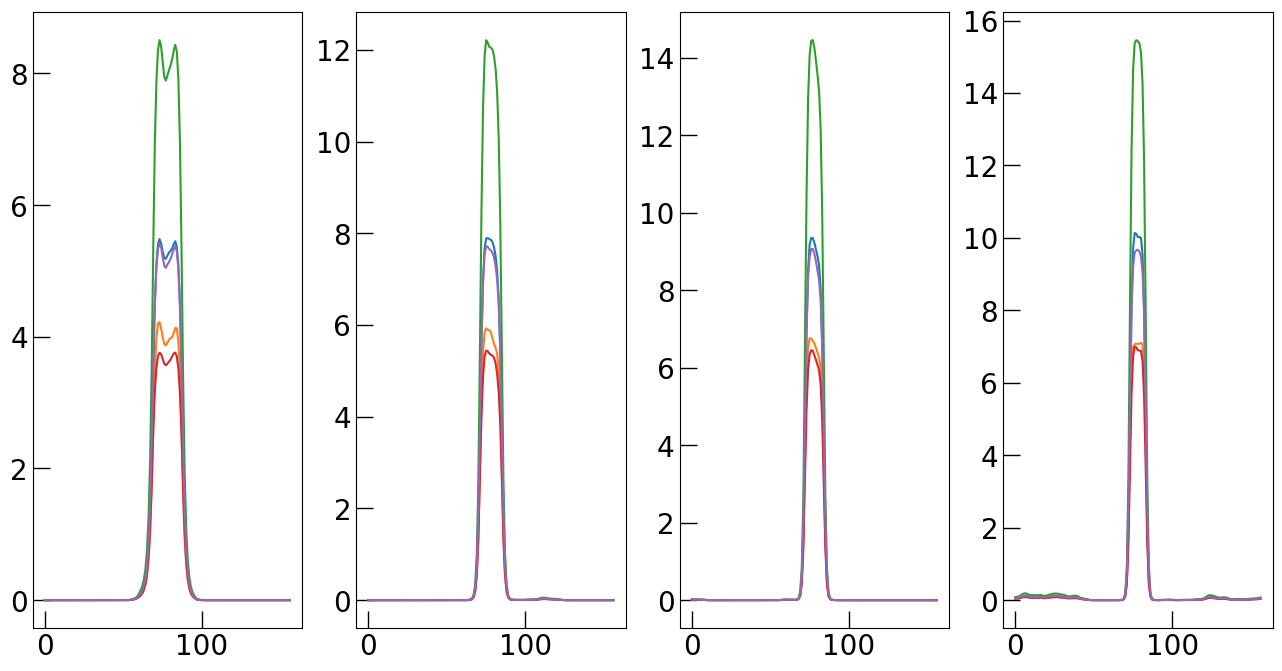

In [9]:
fig, axs = plt.subplots(1,4, figsize=(16,8))
for j,T in enumerate([1,3,5,7]):
    xa, slab_bins = s.density_profile_by_type(T=T)    
    for i in range(5):
        axs[j].plot(xa[i,:,:].mean(axis=0))

In [14]:
z, rho_z, xa, caa, pa, shifts = s.density_profile(T=0)

(33197, 157)


In [15]:
rho_z.shape

(33197, 157)

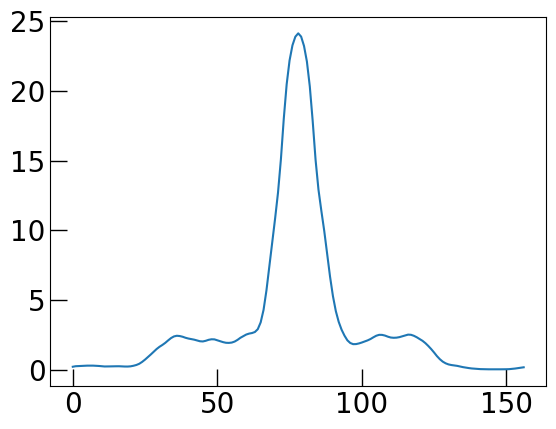

In [16]:
plt.plot(rho_z.mean(axis=0))